# Тест: сравнение старых и новых RSP и FE

In [1]:
import numpy as np
from sklearn.metrics import normalized_mutual_info_score

from cluster import *
from graphs.dataset import *
from graphs.generator import StochasticBlockModelGraphGenerator
from measure.kernel import *
from wrapper import *
from colors import d3
from tqdm import tqdm_notebook as tqdm

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
def plot_ax(ax, name, x, y, error, color1, color2):
    ax.semilogx(x, y, 'k', color=color1, label=name)
    ax.fill_between(x, y-error, y+error,
        alpha=0.2, edgecolor=color1, facecolor=color2,
        linewidth=1, antialiased=True)
    
def plot_result(result, title):
    toplot = []
    for name, results in result.items():
         toplot.append((
             name,
             np.array(list(results.keys())),
             np.array([x[0] for x in results.values()]),
             np.array([x[1] for x in results.values()]))
         )

    fig, ax = plt.subplots(1, figsize=(10, 7))
    for (name, x, y, error), (color1, color2) in zip(toplot, d3()):
        plot_ax(plt, name, x, y, error, color1, color2)
    plt.legend()
    plt.ylim(0, 1)
    plt.title(title) 
    
def lets_go(measures, graphs, info):
    clf = KernelKMeans(n_clusters=info['k'], max_iter=5000, random_state=8)
    pbg = ParallelByGraphs(measures, clf, normalized_mutual_info_score, graphs)
    result = pbg.parallel_by_graphs(np.logspace(-2, np.log10(30), 100), n_jobs=2)
    plot_result(result, info['name'])

In [3]:
measures = [RSP, FE, old_RSP, old_FE, another_RSP, another_FE]

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

81/|/ 81%|| 81/100 [00:19<00:04,  4.05it/s]

A Jupyter Widget

A Jupyter Widget

79/|/ 79%|| 79/100 [00:12<00:03,  6.22it/s]

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

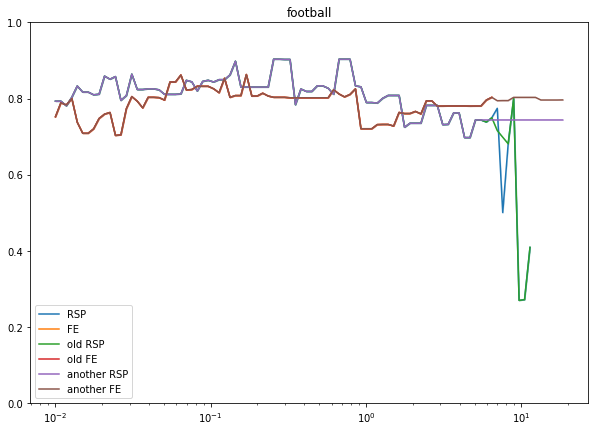

In [4]:
graphs, info = football
lets_go(measures, graphs, info)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

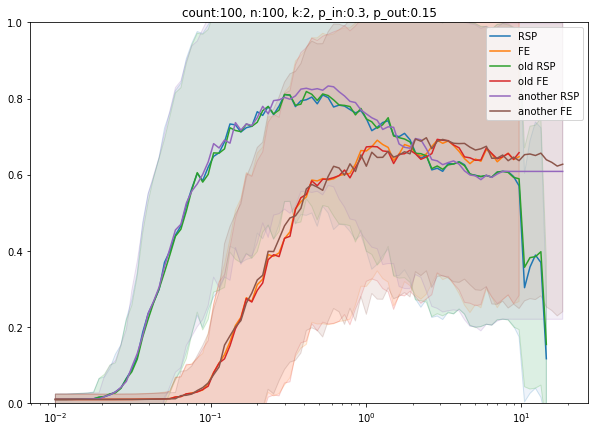

In [5]:
generator = StochasticBlockModelGraphGenerator()
graphs, info = generator.generate_graphs(100, 100, 2, 0.3, 0.15)
lets_go(measures, graphs, info)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

55/|/ 55%|| 55/100 [00:19<00:16,  2.75it/s]

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

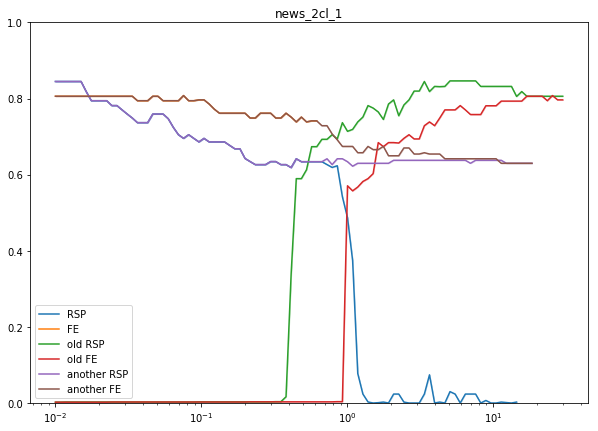

In [6]:
graphs, info = news_2cl_1
lets_go(measures, graphs, info)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

57/|/ 57%|| 57/100 [00:19<00:15,  2.85it/s]

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

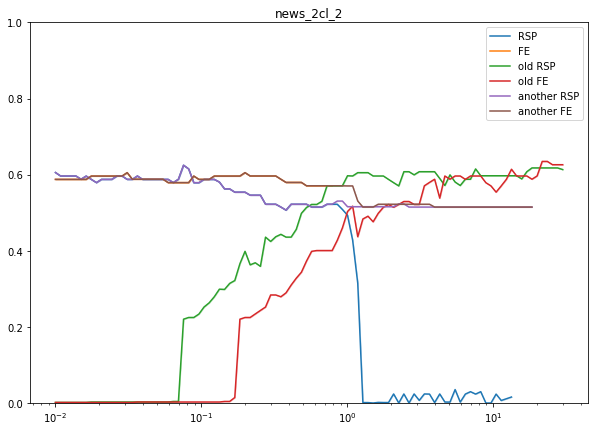

In [7]:
graphs, info = news_2cl_2
lets_go(measures, graphs, info)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

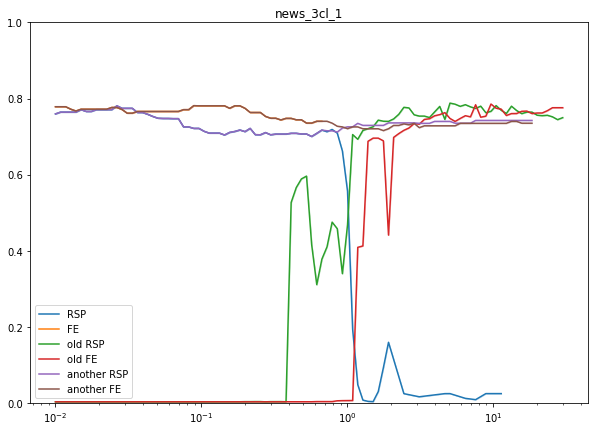

In [9]:
graphs, info = news_3cl_1
lets_go(measures, graphs, info)